# Polar angle

In [1]:
# Imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px





# Import data base
main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
subjects = ['sub-02']
subject = 'sub-02'
tsv_dir ='{}/{}/derivatives/pp_data/{}/fsnative/prf/tsv'.format(main_dir, 
                                                                project_dir, 
                                                                subject)

hemis = ['hemi-L', 'hemi-R']

In [2]:
# Load data
data = pd.read_table('{}/{}_task-prf_loo.tsv'.format(tsv_dir,subject))


# Add prf/cf angle
data['prf_angle'] = np.angle(data.polar_real + 1j * data.polar_imag)
# data['cf_center_angle'] = np.angle(data.cf_center_polar_real + 1j * data.cf_center_polar_imag)
# data['cf_left_angle'] = np.angle(data.cf_left_polar_real + 1j * data.cf_left_polar_imag)
# data['cf_right_angle'] = np.angle(data.cf_right_polar_real + 1j * data.cf_right_polar_imag)
# data['cf_up_angle'] = np.angle(data.cf_up_polar_real + 1j * data.cf_up_polar_imag)
# data['cf_down_angle'] = np.angle(data.cf_down_polar_real + 1j * data.cf_down_polar_imag)

In [3]:
# Filter data
ecc_th = [0, 15]
size_th= [0.1, 20]
rsq_th = [0.05, 1]

# Replace all data outer threshold with NaN data
data.loc[(data.prf_ecc < ecc_th[0]) | (data.prf_ecc > ecc_th[1]) | 
         (data.prf_size < size_th[0]) | (data.prf_size > size_th[1]) | 
         (data.prf_loo_r2 <=rsq_th[0])] = np.nan

data = data.dropna()
rois = pd.unique(data.rois)
mask = pd.notnull(data.subject)
subjects = pd.unique(data.subject[mask])

In [4]:
# Define colors
roi_colors = px.colors.sequential.Sunset[:4] + px.colors.sequential.Rainbow[:]

# Barpolar for 1 subject and 1 ROI

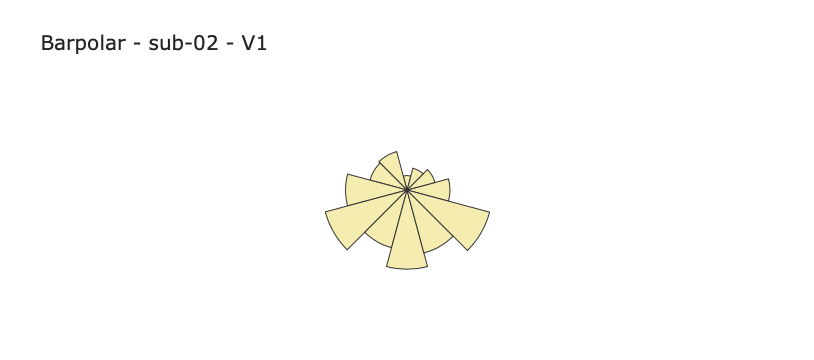

In [27]:
# Filtrer les données pour V1 et l'hémisphère droit du sujet 1
roi = 'V1'
df = data.loc[(data['subject']==subject) & (data['rois']==roi)]
df.prf_angle = np.degrees(df.prf_angle)
df.prf_angle = np.mod(df.prf_angle, 360)

# Créer les tranches d'angle polaire
num_slices = 12
theta_slices = np.linspace(0, 360, num_slices+1, endpoint=True)

# Compter le nombre de voxels dans chaque tranche
voxels_counts, _ = np.histogram(df.prf_angle, bins=theta_slices)

# Créer le graphique barpolar
fig = go.Figure(go.Barpolar(r=voxels_counts,
                            theta=theta_slices,
                            width=30,
                            marker_color=roi_colors[0],
                            marker_line_color='black',  # Couleur de la ligne des barres
                            marker_line_width=1,  # Épaisseur de la ligne des barres
                            opacity=0.8  # Opacité des barres
                           ))

# Define parameters
fig.update_polars(radialaxis=dict(visible=False), angularaxis=dict(visible=False), barmode='overlay')
fig.update_layout(title='Barpolar - {} - {} '.format(subject,roi), title_font_size=20, template='simple_white')
# fig.write_image('/home/mchevillard/disks/meso_S/figures/sub-001_polar_V1.pdf')

# Subplot all ROIs by subject

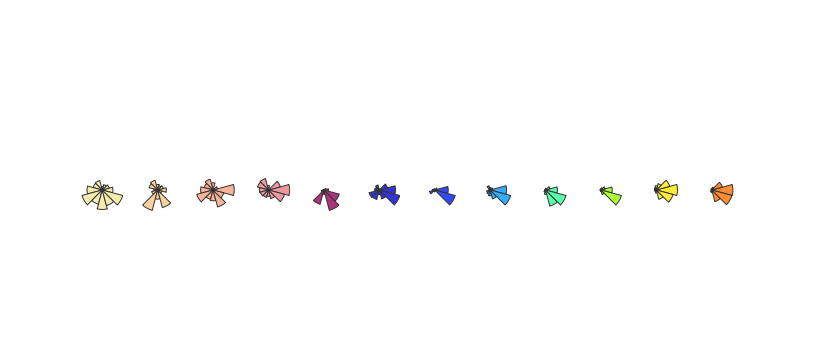

In [28]:
rows, cols = 1, 12
fig_height, fig_width = 300, 800
specs = [[{'type': 'polar'}] * cols]

num_slices = 12

for i, subject in enumerate(subjects):
    fig = make_subplots(rows=rows, cols=cols, print_grid=False, specs=specs)

    for j, roi in enumerate(rois):

        df = data.loc[(data.subject == subject) & (data.rois==roi)]
        # df = df.sort_values('prf_rsq_loo', ascending=False)
        # df = df.head(250)
        
        df.prf_angle = np.degrees(df.prf_angle)
        df.prf_angle = np.mod(df.prf_angle, 360)

        # Parts of polar angles and number of voxels in each part
        theta_slices = np.linspace(0, 360, num_slices+1, endpoint=True)
        voxels_counts, _ = np.histogram(df.prf_angle, bins=theta_slices)

        # barpolar
        fig.add_trace(go.Barpolar(r=voxels_counts, theta=theta_slices, width=30, 
                                  marker_color=roi_colors[j], marker_line_color='black', 
                                  marker_line_width=1, opacity=0.8), row=1, col=j+1)

    # Define parameters    
    fig.update_polars(angularaxis=dict(visible=False), radialaxis=dict(visible=False))
    fig.update_layout(height=fig_height, width=fig_width, showlegend=False, template='simple_white')

    fig.show()
    # fig.write_image('/home/mchevillard/disks/meso_S/figures/{}_subplot_polar.pdf'.format(subject))

## Only RIGHT / LEFT HEMISPHERE

In [7]:
rows, cols = 1, 12
fig_height, fig_width = 300, 1920
specs = [[{'type': 'polar'}] * cols]
num_slices = 12

for hemi in hemis:
    for i, subject in enumerate(subjects):
        fig = make_subplots(rows=rows, cols=cols, print_grid=False, specs=specs)

        for j, roi in enumerate(rois):

            df = data.loc[(data.subject == subject) & (data.rois==roi) & (data.hemi == hemi)]
            df = df.sort_values('prf_loo_r2', ascending=False)
            df = df.head(250)

            #Conversion
            df.prf_angle = np.degrees(df.prf_angle)
            df.prf_angle = np.mod(df.prf_angle, 360)

            # Parts of polar angles and number of voxels in each part
            theta_slices = np.linspace(0, 360, num_slices+1, endpoint=True)
            voxels_counts, _ = np.histogram(df.prf_angle, bins=theta_slices)

            # barpolar
            fig.add_trace(go.Barpolar(r=voxels_counts, theta=theta_slices, width=30, 
                                      marker_color=roi_colors[j], marker_line_color='black', 
                                      marker_line_width=1, opacity=0.8), row=1, col=j+1)

        # Define parameters
        fig.update_polars(angularaxis=dict(visible=False), radialaxis=dict(visible=False))
        fig.update_layout(height=fig_height, width=fig_width, showlegend=False, template='simple_white')
        #fig.show()
        fig.write_image('/Users/uriel/Downloads/{}_subplot_polar_{}.pdf'.format(subject,hemi))


# Contralaterality 
## One subject one area

In [36]:
# Filtrer les données pour V1 et l'hémisphère droit du sujet 1 
df_rh = data.loc[(data['subject'] ==subject) & (data['rois'] =='V1') & (data['hemi'] == 'hemi-R')]

# Filtrer les données pour V1 et l'hémisphère gauche du sujet 1
df_lh = data.loc[(data['subject'] ==subject) & (data['rois'] =='V1') & (data['hemi'] == 'hemi-L')]

In [37]:
# Calculer le pourcentage de contralatéralité pour chaque hémisphère pondéré par RSQ
percentage_right = sum(df_rh.loc[df_rh.prf_x < 0].prf_loo_r2) / sum(df_rh.prf_loo_r2) * 100
percentage_left = sum(df_lh.loc[df_lh.prf_x > 0].prf_loo_r2) / sum(df_lh.prf_loo_r2) * 100

# Calculer le pourcentage d'excentricité total
percentage_total = (sum(df_rh.loc[df_rh.prf_x < 0].prf_loo_r2) + sum(df_lh.loc[df_lh.prf_x > 0].prf_loo_r2))/ (sum(df_rh.prf_loo_r2)+sum(df_lh.prf_loo_r2)) *100

print("Pourcentage de contralatéralité de l'hémisphère droit : {:.2f}%".format(percentage_right))
print("Pourcentage de contralatéralité de l'hémisphère gauche : {:.2f}%".format(percentage_left))
print("Pourcentage de contralatéralité total : {:.1f}%".format(percentage_total))

Pourcentage de contralatéralité de l'hémisphère droit : 93.98%
Pourcentage de contralatéralité de l'hémisphère gauche : 98.41%
Pourcentage de contralatéralité total : 96.1%


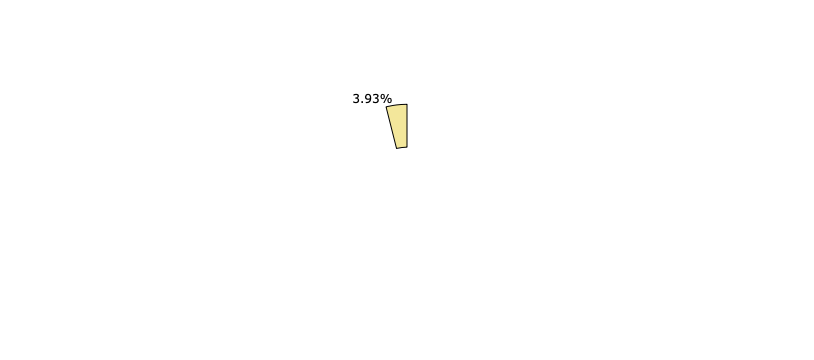

In [35]:
# Valeurs correspondant au pourcentage total et au complément à 100%
values = [percentage_total, 100-percentage_total]
fig = go.Figure()
fig.add_trace(go.Pie(values=values,
                     hole=0.5,
                     marker=dict(colors=[roi_colors[0], 'rgb(255,255,255)'], 
                     line=dict(color=['black', 'white'], width=[1,0])),
                     showlegend=False,
                     textfont=dict(color=['black', 'white']),
                     textfont_size=12, 
                     pull=[0, 0.05]
                     ))

# Mise en forme du layout
fig.update_layout(showlegend=False, template='simple_white')
fig.show()
# fig.write_image('/home/mchevillard/disks/meso_S/figures/sub-001_contra_iPCS.pdf')


## Subplot all areas

In [10]:
rows, cols = 1, 12
fig_height, fig_width = 300, 1920
specs = [[{'type': 'pie'}] * cols]

roi_colors = px.colors.sequential.Sunset[:4] + px.colors.sequential.Rainbow[:]

for i, subject in enumerate(subjects):
    fig = make_subplots(rows=rows, cols=cols, print_grid=False, specs=specs)
    for j, roi in enumerate(rois):
        
        df_rh = data.loc[(data.subject == subject) & (data.rois == roi) & (data.hemi == 'hemi-R')]
        df_lh = data.loc[(data.subject == subject) & (data.rois == roi) & (data.hemi == 'hemi-L')]
        
        # Calculer le pourcentage de contralatéralité pour chaque hémisphère pondéré par RSQ
        percentage_right = sum(df_rh.loc[df_rh.prf_x < 0].prf_loo_r2) / sum(df_rh.prf_loo_r2) * 100
        percentage_left = sum(df_lh.loc[df_lh.prf_x > 0].prf_loo_r2) / sum(df_lh.prf_loo_r2) * 100

        # Calculer le pourcentage d'excentricité total
        percentage_total = (sum(df_rh.loc[df_rh.prf_x < 0].prf_loo_r2) + sum(df_lh.loc[df_lh.prf_x > 0].prf_loo_r2))/ (sum(df_rh.prf_loo_r2)+sum(df_lh.prf_loo_r2)) *100
    
        # print("{} - Contralateralité in {}: {:.1f}%".format(subject, roi, percentage_total))
        percentage_rest = 100 - percentage_total        
        
        values = [percentage_total, percentage_rest]
        
        fig.add_trace(go.Pie(values=values,
                             hole=0.5,
                             marker=dict(colors=[roi_colors[j], 'white'], line=dict(color=['black', 'white'], width=[1,0])),
                             showlegend=False,
                             pull=[0, 0.01],
                             rotation=percentage_total*3.6 if percentage_total<percentage_rest else 0,
                             ), row=1, col=j+1)

    # Define parameters
    fig.update_layout(height=fig_height, width=fig_width, showlegend=False, template='simple_white')
    #fig.show()

    # fig.write_image('/home/mchevillard/disks/meso_S/figures/{}_contralaterality.pdf'.format(subject))
    fig.write_image("/Users/uriel/Downloads/{}_contralaterality.pdf".format(subject))
    